# Sedflux3D


Sedflux is a stratigraphic model to simulate basin fill. It deposits layers of sediment arriving from an incoming river into a marine basin. 

The most important process simulated in Sedflux3D is delta plume sedimentation. This is being done by a module named 'Plume'. It assumes an incoming river with certain channel dimensions, and a given sediment concentration (for several grain size classes) and then calculates the resulting river plume dimensions upon entering in the marine domain.
Settle rates are set for different grainsize classes and determine how rapidly sediment grains from the total sediment inventory settle out with distance from the river mouth. The theory behind the encoded plume dynamics originates from lab experiments (Albertson, 1950). Plume dynamics can be influenced by longshore currents or by Coriolis force and then result in a curved plume geometry. 
An additional important process is river mouth bedload deposition, separately calculated for the coarsest bedload grain size class. 

Sedflux can be used in both 2D (a line model) and 3D (planview with layers of deposition). This notebook show you an example of the 3D sedflux version.

Prepared by Irina Overeem for Sedimentary Systems Modelin, November 2020.


## Learning Objectives

Topical skills
- how suspended sediment spreads as an advection plume upon encountering a marine basin
- learn what are the effects of different suspended sediment grainsize classes, and their settle rates on the depositional patterns
- learn about the effect sea level can have on plume deposition and delta progradation

Coding skills
- how to read a csv file from a different directory
- work with methods inherited from the pymt bmi class
- work with different colormaps from matplotlib

### References: 

Albertson, M.L., Dai, Y.B., Jensen, R.A., Hunter, R., 1950, Diffusion of submerged jets. American Society Civil Engineers Trans, v. 115, p. 639-697.

Syvitski, J.P.M., Skene, K.I., Nicholson-Murray, K., Morehead, M., 1998a, PLUME 1.1; deposition of sediment from a fluvial plume. Computers & Geosciences, v. 24, 2, p. 159-171.

Hutton, E. W. H. and Syvitski, J. P. M., 2008. Sedflux 2.0: An advanced process-response model that generates three-dimensional stratigraphy. Computer & Geosciences, 34, 1319-1337, Doi: 10.1016/j.cageo.2008.02.013.


## Get started

As always, we import several relevant Python libraries.
Import the `Sedflux3D` component from `pymt`. All of the components available to `pymt` are located in `pymt.components`. Here I've named the component to be `sedflux` but remember that once you want to set up the model differently, and still keep some of the earlier output for comparisons, it may be needed to start a new instance.

In [1]:
# specific for this notebook printing functionality
from __future__ import print_function

# for array manipulation
import numpy as np

# for other plotting
import matplotlib.pyplot as plt

# Some magic to make plots appear within the notebook
%matplotlib inline



In [2]:
import pymt.models

➡ models: Avulsion, Plume, Sedflux3D, Subside, Rafem, PRMSSurface, PRMSStreamflow, PRMSSoil, PRMSGroundwater, FrostNumber, Ku, Hydrotrend, GIPL, ECSimpleSnow, Cem, Waves


In [3]:
#Instantiate a new Sedflux model 

sedflux = pymt.models.Sedflux3D()

In [4]:
# basic documentation associated with this open source model 
help(sedflux)

Help on Sedflux3D in module pymt.framework.bmi_bridge object:

class Sedflux3D(BmiCap)
 |  Basic Model Interface for sedflux.
 |  
 |  Sedflux3D is a basin filling stratigraphic model. Sedflux3d simulates
 |  long-term marine sediment transport and accumulation into a three-
 |  dimensional basin over time scales of tens of thousands of years. It
 |  simulates the dynamics of strata formation of continental margins
 |  based on distribution of river plumes and tectonics.
 |  
 |  Author:
 |  - Eric Hutton
 |  Version: 2.1
 |  License: MIT
 |  DOI: 10.1594/IEDA/100161
 |  URL: http://csdms.colorado.edu/wiki/Model_help:Sedflux
 |  
 |  Cite as:
 |  
 |      @article{hutton2008sedflux,
 |      title={Sedflux 2.0: An advanced process-response model that generates three-dimensional stratigraphy},
 |      author={Hutton, Eric WH and Syvitski, James PM},
 |      journal={Computers \& Geosciences},
 |      volume={34},
 |      number={10},
 |      pages={1319--1337},
 |      year={2008},
 |   

In [5]:
# Clean up in case you run this notebook from the start many times
# this will ensure that the folders you made are cleaned up
#rm -rf sedflux

SyntaxError: invalid syntax (<ipython-input-5-443b4f503e8c>, line 3)

We are now rather familiar with this procedure: 
First we instantiate the component and then call its `setup` method to create a model simulation with the necessary input files. `setup` takes an optional argument that gives a path to a folder that will contain the necessary input files (if not provided, a temporary folder will be used). `setup` returns the name of the config file and the path to the folder containing it (we'll use this information later when we run `initialize`).

In [6]:
config_file, initdir = sedflux.setup('run1', run_duration=3650000.)

If we look inside the `run1` folder, we can see all of the necessary sedflux input files ready to run.

In [7]:
ls run1

sedflux_3d_argv.txt   sedflux_3d_process.kvf    sedflux_3d_sediment.kvf
sedflux_3d_bathy.csv  sedflux_3d_river.kvf
sedflux_3d_init.kvf   sedflux_3d_sea_level.csv


# Assignment 1 

Let's explore a bit how we are setting up the sedflux model. Recall sedflux is a marine sedimentation model, it transfers sediment of a river into the ocean by simulating delta plumes. 

Write code to read in the sea level file. It is called 'sedflux_3d_sea_level.csv', and located in your run1 directory.
Print out the file values, and interpret what is being printed. 
Describe what implications this has for a delta progradation simulation.


In [ ]:
# your code goes here.


In [ ]:
# your explanation of the file and your ideas/hyothesis of sea level on delta progradation goes here

# Assignment 2

If you browsed a bit in the newly generated folder ./run1 you would see a score of other input files. 
There is one that controls all active processes (sedflux_3d_process.kvf), one that sets the river input (sedflux_3d_river.kvf) etc. 

Open the sedflux_3D_sediment.kvf file

Interpret what input parameters are being set in this file.
- how many sediment classes are being used in this simulation?
- what is removal rate? Why is it so different for the different classes?


In [ ]:
# your explaination of the input parameters goes here



The `initialize` method reads all of the input files and gets the model ready to update through time.

In [8]:
sedflux.initialize(config_file, dir=initdir)

In [9]:
# here we specify the properties of the incoming river dynamics, its flow velocity, its depth and width and sediment concentration
sedflux.set_value("channel_exit_water_flow__speed", 1.2)
sedflux.set_value("channel_exit_x-section__mean_of_width", 400.)
sedflux.set_value("channel_exit_x-section__mean_of_depth", 4.)
sedflux.set_value("channel_exit_water_sediment~suspended__mass_concentration", .01)

array([ 0.01])

## Assignment 3


Find out what are the units of the water flow speed and the suspended mass concentration. 

In [ ]:
# your code to retrieve units of the parameters goes here.

# Controlling the time steps of the simulation

Here we update the model for 10 time steps, printing the model time after each step.

In [10]:
for t in range(10):
    sedflux.update()
    print(sedflux.time)

365.00000000036493
730.0000000010949
1095.00000000219
1460.00000000365
1825.000000005475
2190.000000007665
2555.00000001022
2920.00000001314
3285.0000000164246
3650.0000000200744


From the output it appears that sedflux is operating on a 1 year time step and is using units of *days*. We can double check that assumption.

In [11]:
sedflux.time_units

'd'

Yep, *days*. And the time step...

In [12]:
sedflux.time_step

365.0

The `update_until` method gives us more control by allowing us to update to a particular time. Using the `units` keyword allows us to specify the "until" time. Here we update the model until 200 years.

In [13]:
sedflux.update_until(200., units='year')
sedflux.time

73048.43975632306

In [14]:
sedflux.time_units = 'year'
print(sedflux.time)

200.00000000020003


We've covered how to setup and run a model, now we'll have a look at how to get data out of the model. As before, is done with the `get_value` method but first we need to look at what variables the model provides. This is accessed through the `output_var_names` attribute.

In [15]:
sedflux.output_var_names

('land-or-seabed_sediment_grain__mean_diameter',
 'sea_water__depth',
 'sea_bottom_sediment__bulk_mass-per-volume_density',
 'sea_bottom_surface__elevation',
 'sea_bottom_sediment_grain__mean_diameter',
 'bedrock_surface__elevation',
 'land-or-seabed_sediment__permeability',
 'land-or-seabed_sediment_surface__y_derivative_of_elevation',
 'sea_bottom_sediment__porosity',
 'land-or-seabed_sediment_silt__volume_fraction',
 'land-or-seabed_sediment_surface__elevation',
 'land-or-seabed_sediment_clay__volume_fraction',
 'sea_bottom_sediment_mud__volume_fraction',
 'land-or-seabed_sediment_sand__volume_fraction',
 'land-or-seabed_sediment__mean_of_deposition_age',
 'sea_bottom_surface__y_derivative_of_elevation',
 'sea_bottom_sediment_clay__volume_fraction',
 'land-or-seabed_sediment__porosity',
 'land-or-seabed_sediment__bulk_mass-per-volume_density',
 'land-or-seabed_sediment_mud__volume_fraction',
 'land-or-seabed_sediment_surface__x_derivative_of_elevation',
 'sea_bottom_sediment__permea

# Assignment 4

So we learned that Sedflux is a 'stratigraphic model. That means the model generates depositional packages over time in the basin. 

From the list of output parameters, identify two parameters that would be important descriptors of deposited layers for subsurface characterization. Explain how these two parameters would be important.

Also, the model keeps track of deposits age. 
How would this work in the model code? 
Why would the parameter be called 'sediment__mean_of_deposition_age'?

In [16]:
# your answers go here



In [17]:
sedflux.input_var_names

('bedrock_surface__elevation',
 'channel_water_sediment~bedload__mass_flow_rate',
 'sea_bottom_sediment__increment_of_thickness',
 'bedrock_surface__increment_of_elevation',
 'channel_exit_water__volume_flow_rate',
 'channel_exit_water_flow__speed',
 'channel_exit_x-section__mean_of_width',
 'channel_exit_x-section__mean_of_depth',
 'channel_exit_water_sediment~suspended__mass_concentration')

So to get the values of, say, water depth,

In [18]:
sedflux.get_value('sea_water__depth')

array([ 50.,  50.,  50., ..., -30., -30., -30.])

As with previous methods, you can use the `units` keyword to specify units. Here we get water depths in units of parsecs.

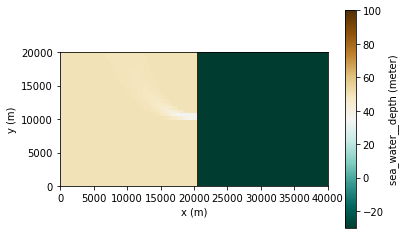

In [19]:
sedflux.quick_plot('sea_water__depth', vmin=-30, vmax=100, cmap='BrBG_r')

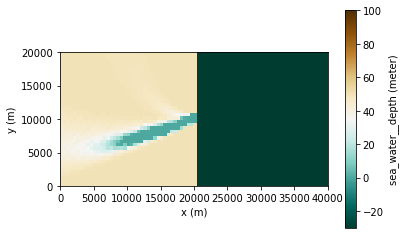

In [20]:
# for the next 100 years of run time, we set the river sediment load to be significantly higher
sedflux.set_value("channel_exit_water_sediment~suspended__mass_concentration", .5)
for t in range(100):
    sedflux.update()
sedflux.quick_plot('sea_water__depth', vmin=-30, vmax=100, cmap='BrBG_r')

# Assignment 5

Describe what the plot shows you.

In [ ]:
# your answer goes here


# Assignment 6

Instead of showing water depth after the simulation, can you make two planview maps of the distribution of sand and mud over the sea floor? Think about how you would need to change the axis limits for the plot.

And, instead of using the color map for land and sea floor, perhaps use another colormap. 
You can find more ideas for picking an appropriate color map here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


In [ ]:
# your code for sand distribution goes here


In [ ]:
# your code for silt or mud distribution goes here


In [ ]:
# Describe what the two grainsize maps show you. Is this logical?


# Assignment 7 

Run the Sedflux model for an additional 100 years, but set the river to be 4 times as wide, less deep and (consequently) to have a lower flow velocity. 


In [ ]:
# the code for running an additional 100 years, with a wider river goes here

In [ ]:
# plot here the updated sand distribution



In [ ]:
sedflux.finalize()

# BONUS ASSIGNMENT 8

Set up a completely new Sedflux3D run. 

Replace the sea level file with a rapidly falling sea level (or rising what ever you find interesting). This can be done by manipulating the newly generated textfile directly. Cast a hypothesis beforehand about what your sea water depth and sand maps at the end of the run would look like. 

Run for 200 years. <br>
Plot the sea water depth map and the sand distribution map at the end of the simulation for theses sea level conditions. 
Are these results what you had expected?
<br>


In [ ]:
# set up a new simulation here, run it for 200 years

In [ ]:
# plotting can go here

In [ ]:
# type interpreations up here, do not forget to talk about your initial hypothesis

# YOU ARE ALL DONE WITH THIS LAST NOTEBOOK!! 